In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/func-urban-areas/FUA_assessment.csv
/kaggle/input/fuas-2/Fuas2.csv


Data Sourced From: OECD Regions - https//oe.cd/geostats

In [2]:
#Initial packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pty
#Support packages
import plotly.express as px
import time
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("Imported")

Imported


In [3]:
FUA = pd.read_csv('/kaggle/input/fuas-2/Fuas2.csv')
FUA.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TRAN@DF_SERVICE_ACCESS(1.1),Access to services - FUAs,I,BE012F,Mechelen,A,Annual,POP_WITH_ACCESS,Population with access to at least one service...,...,2024,NaN,57.2,NaN,A,Normal value,0,Units,1,One
1,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TRAN@DF_SERVICE_ACCESS(1.1),Access to services - FUAs,I,CH004F,Basel,A,Annual,POP_WITH_ACCESS,Population with access to at least one service...,...,2024,NaN,68.5,NaN,A,Normal value,0,Units,1,One
2,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TRAN@DF_SERVICE_ACCESS(1.1),Access to services - FUAs,I,CZ010F,Pardubice,A,Annual,POP_WITH_ACCESS,Population with access to at least one service...,...,2024,NaN,49.3,NaN,A,Normal value,0,Units,1,One
3,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TRAN@DF_SERVICE_ACCESS(1.1),Access to services - FUAs,I,DE026F,Regensburg,A,Annual,POP_WITH_ACCESS,Population with access to at least one service...,...,2024,NaN,47.1,NaN,A,Normal value,0,Units,1,One
4,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TRAN@DF_SERVICE_ACCESS(1.1),Access to services - FUAs,I,DE052F,Neumünster,A,Annual,POP_WITH_ACCESS,Population with access to at least one service...,...,2024,NaN,50.9,NaN,A,Normal value,0,Units,1,One


In [4]:
drop_columns = ['Travel time', 'UNIT_MEASURE', 'Mode of transport', 'TRAN_MODE', 'Unit of measure', 'SERVICE','TRAVEL_TIME', 'TERRITORIAL_LEVEL', 'Territorial level', 'STRUCTURE_ID', 'STRUCTURE', 'STRUCTURE_NAME', 'ACTION', 'FREQ', 'MEASURE', 'Measure', 'Time period', 'Observation value', 'OBS_STATUS', 'Observation value', 'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals']

FUA_cleaned = FUA.drop(columns = drop_columns)
FUA_cleaned.head(10)


,REF_AREA,Reference area,Frequency of observation,Service,TIME_PERIOD,OBS_VALUE
0,BE012F,Mechelen,Annual,Pharmacy,2024,57.2
1,CH004F,Basel,Annual,Pharmacy,2024,68.5
2,CZ010F,Pardubice,Annual,Pharmacy,2024,49.3
3,DE026F,Regensburg,Annual,Pharmacy,2024,47.1
4,DE052F,Neumünster,Annual,Pharmacy,2024,50.9
5,DE105F,Bremerhaven,Annual,Pharmacy,2024,50.9
6,DE117F,Cottbus,Annual,Pharmacy,2024,39.0
7,ES018F,Logroño,Annual,Pharmacy,2024,71.9
8,FR047F,Poitiers,Annual,Pharmacy,2024,50.8
9,IT012F,Verona,Annual,Pharmacy,2024,75.3


In [5]:
FUA_cleaned.shape

(7113, 6)

OBS_VALUE is the number of occurences made meanwhile the frequency of observation is how often the attempt to make observations occurs. Lets start by working with our service column. 

Alright we have the totals for each type of service. Lets get a chart for easy interpretation.

In [6]:
service_counts = FUA_cleaned['Service'].value_counts().reset_index()
print(service_counts)




          Service  count
0        Pharmacy   2655
1  Primary school   2553
2       Childcare   1905


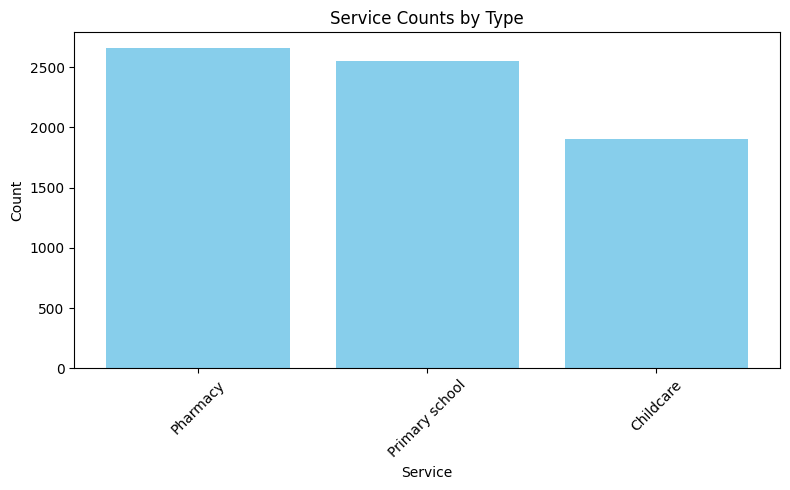

In [7]:
services = service_counts['Service']
counts = service_counts['count']

plt.figure(figsize=(8,5))
plt.bar(services, counts, color = 'skyblue')
plt.title('Service Counts by Type')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [9]:
location_counts = FUA_cleaned['Reference area'].value_counts().reset_index()
location_counts.columns = ['Reference area', 'Service Count']

print(location_counts)

         Reference area  Service Count
0           Guadalajara             15
1                Zamora             15
2             Salamanca             15
3             Cartagena             12
4               Linares             12
...                 ...            ...
1158            Duitama              3
1159  Greater Melbourne              3
1160              Mainz              3
1161       Zalaegerszeg              3
1162         Cheltenham              3

[1163 rows x 2 columns]


There are only three services total that are being account for so Guadalajara having 15 is insane. It would be safe to say that Guadalajara has a different OBS_VALUE.

In [10]:
print(FUA_cleaned[FUA_cleaned['Reference area'] == 'Guadalajara'])

     REF_AREA Reference area Frequency of observation         Service  \
37     ES041F    Guadalajara                   Annual        Pharmacy   
483    ES041F    Guadalajara                   Annual       Childcare   
923    ES041F    Guadalajara                   Annual       Childcare   
1786   ES041F    Guadalajara                   Annual        Pharmacy   
1833   ES041F    Guadalajara                   Annual       Childcare   
2375   MEX02F    Guadalajara                   Annual       Childcare   
2826   MEX02F    Guadalajara                   Annual       Childcare   
4001   ES041F    Guadalajara                   Annual        Pharmacy   
4688   MEX02F    Guadalajara                   Annual       Childcare   
5529   ES041F    Guadalajara                   Annual  Primary school   
6304   MEX02F    Guadalajara                   Annual  Primary school   
6337   MEX02F    Guadalajara                   Annual  Primary school   
6438   MEX02F    Guadalajara                   Annu

So what im gathering here is that Guadalajara has more physical buildings that were observed which would explain why we have more entries compared to other cities. Lets build a side by side dashboard that compares two cities side by side.

In [11]:
dboard_Fua = FUA_cleaned.copy()
city_service_counts = dboard_Fua.groupby(['Reference area', 'Service']).size().reset_index(name = 'Count')

cities = dboard_Fua['Reference area'].dropna().unique()
city1, city2 = random.sample(list(cities), 2)


df1 = city_service_counts[city_service_counts['Reference area'] == city1]
df2 = city_service_counts[city_service_counts['Reference area'] == city2]

services = dboard_Fua['Service'].unique()
df1 = df1.set_index('Service').reindex(services, fill_value = 0).reset_index()
df2 = df2.set_index('Service').reindex(services, fill_value = 0).reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=[f"{city1}", f"{city2}"])


fig.add_trace(go.Bar(
    x=df1['Service'],
    y=df1['Count'],
    name=city1,
    marker_color='indianred'
), row=1, col=1)


fig.add_trace(go.Bar(
    x=df2['Service'],
    y=df2['Count'],
    name=city2,
    marker_color='steelblue'
), row=1, col=2)


fig.update_layout(
    title_text=f"Service Availability: {city1} vs {city2}",
    showlegend=False,
    height=500,
    width=1000
)

fig.show()

In [ ]:
print(FUA_cleaned[FUA_cleaned['Reference area'] == 'Regensburg'])

In [ ]:
print(FUA_cleaned[FUA_cleaned['Reference area'] == 'Grosseto'])

Now we can compare two cities and see how services differ. For example. Regensburg has Pharmacies but no Childcare or Primary Schools compared to Grosseto which has all three services.

We should group the cities and sort them by the amount of services they provide.

In [19]:
service_matrix['Service Count'] = service_matrix.sum(axis = 1)
service_distribution = (
    service_matrix['Service Count']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns = {'index': 'Number of Services', 'Service Count': 'City'})
)
combo_counts = (
    service_matrix
    .reset_index()
    .groupby(list(service_matrix.columns))
    .size()
    .reset_index(name = 'City Count')
)
print(combo_counts)


   Childcare  Pharmacy  Primary school  Service Count  City Count
0          0         0               1              2         177
1          0         1               0              2         318
2          0         1               1              4          36
3          1         0               1              4         103
4          1         1               1              6         529


Lets create a pie chart. To begin we will need to divide the cities by the amount of services provided and then create the pie chart.

In [30]:
services_count = FUA_cleaned.copy()
presence_matrix = (
    services_count
    .drop_duplicates()
    .assign(present=1)
    .pivot_table(index = 'Reference area', columns = 'Service', values = 'present')
)

presence_matrix['Number of Services'] = presence_matrix.sum(axis=1)
services_count_i = presence_matrix[['Number of Services']].reset_index()
print(services_count_i.head())

Service    Reference area  Number of Services
0           's-Gravenhage                 3.0
1        's-Hertogenbosch                 3.0
2                A Coruña                 3.0
3                  Aachen                 1.0
4                 Aalborg                 2.0


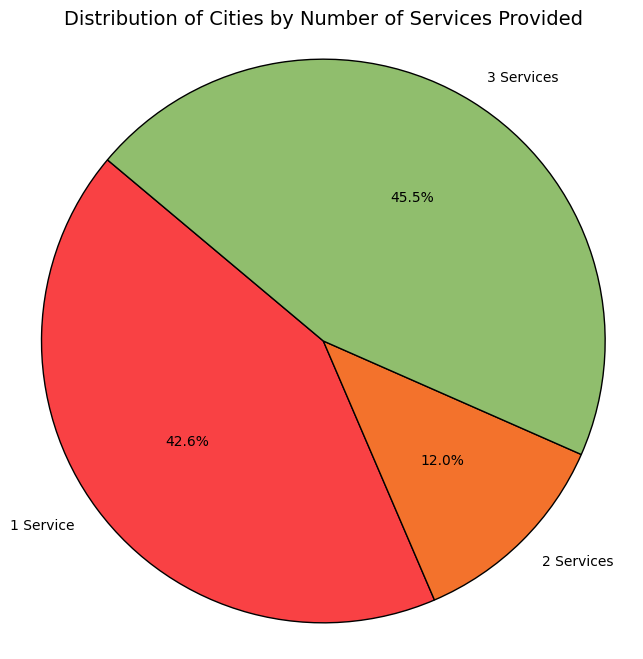

In [42]:
distribution = services_count_i['Number of Services'].value_counts().sort_index()
labels = [f'{int(k)} Service{"s" if k != 1 else ""}' for k in distribution.index]
sizes = distribution.values
colors = ['#f94144', '#f3722c', '#90be6d', '#577590']

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels = labels,
    autopct = '%1.1f%%',
    startangle=140,
    colors = colors,
    wedgeprops={'edgecolor':'black'}
)

plt.title('Distribution of Cities by Number of Services Provided', fontsize = 14)
plt.axis('equal')
plt.show()

***RECOMMENDATION***
1. Note the size of the cities.
2. Include longitude and latitude of the cities.